In [48]:
from pandas import DataFrame
import pandas as pd
from Bio import SeqIO
# load data
df = pd.read_csv("output/ncov2019_ncbi_spike_simple.csv", index_col=0)

In [3]:
df['Geo_Location'].value_counts()

USA               2031
China               67
India               28
Thailand            23
Taiwan              22
Hong Kong           21
Spain               21
Puerto Rico         12
Czech Republic       7
Japan                5
South Korea          4
Greece               4
Kazakhstan           4
Sri Lanka            4
Malaysia             4
Iran                 3
Serbia               2
Italy                2
Brazil               2
Vietnam              2
Israel               2
Pakistan             2
France               1
Peru                 1
Turkey               1
Netherlands          1
Finland              1
South Africa         1
Australia            1
Nepal                1
Sweden               1
Germany              1
Colombia             1
Name: Geo_Location, dtype: int64

In [43]:
data_prot = []
data_nuc = []
geo = []

var_geo = df['Geo_Location'].unique()

for i in var_geo:
    x = df.loc[df['Geo_Location'] == i, "Accession"]
    p = df.loc[df['Geo_Location'] == i, "protein_id"]
    if len(x) > 10 :
        index = list(x.index[0:9])
        for y in index:
            data_nuc.append(x[y])
            data_prot.append(p[y])
            geo.append(i)
    else:
        for y in x.values:
            data_nuc.append(y)
            geo.append(i)
        for y in p.values:
            data_prot.append(y)

In [79]:
data_nuc[0]

'NC_045512'

In [115]:
from os import listdir

gene_records = []

fasta_gene = listdir("output/gene/")
for n in data_nuc:
    for i in fasta_gene:
        if n in i:
            records = SeqIO.parse("output/gene/"+i, "fasta")
            seq_record = next(records)
            sequence = str(seq_record.seq).upper()
            amb = float(sequence.count("N"))
            if amb > 0 :
                print(seq_record.id + " " +str(amb))
            else:
                gene_records.append(seq_record)
            #print(seq_record.id)
SeqIO.write(gene_records, "output/spike_nucleotide.faa", "fasta")

MT434758.1 1.0
MT434760.1 1.0
MT419817.1 3.0
MT394864.1 485.0
MT371568.1 9.0
MT371569.1 39.0
MT372482.1 51.0
MT372483.1 198.0
MT292570.1 1.0


121

In [94]:
protein_records = []
fasta_protein = listdir("output/protein/")
for n in data_prot:
    for i in fasta_protein:
        if n in i:
            records = SeqIO.parse("output/protein/"+i, "fasta")
            seq_record = next(records)
            protein_records.append(seq_record)
            #print(seq_record.id)
SeqIO.write(protein_records, "output/spike_protein.faa", "fasta")

130

In [113]:
for seq_record in SeqIO.parse("output/spike_nucleotide.faa", "fasta"):
    sequence = str(seq_record.seq).upper()
    n = float(sequence.count("N"))
    if n > 0 :
              print(seq_record.id + " " +str(n))

MT434758.1 1.0
MT434760.1 1.0
MT419817.1 3.0
MT394864.1 485.0
MT371568.1 9.0
MT371569.1 39.0
MT372482.1 51.0
MT372483.1 198.0
MT292570.1 1.0


In [301]:
from Bio import motifs
import matplotlib.pyplot as plt
import numpy as np 

In [302]:
def bit_matrix(m, start, stop, title):
    pwm = m.counts.normalize(pseudocounts=0.5)
    pssm = pwm.log_odds()
    matrix_draw = [pssm['A'][start:stop],pssm['C'][start:stop],pssm['G'][start:stop],pssm['T'][start:stop]]
    
    # set the size of the figure
    plt.figure(figsize=[20,2])

    # show the array flipped (transposed) and with no colour interpolation smoothing
    plt.imshow(matrix_draw,interpolation='nearest')

    # set the ticks
    #plt.xticks(range(0,100))#,range(1,51))
    plt.yticks(range(4),['A','C','G','T'])

    # set the colorbar
    plt.clim()
    plt.colorbar()

    # title
    plt.title('base bit score matrix of'+title+' '+str(start)+":"+str(stop),fontsize=10)

    # show the figure
    return plt.show()

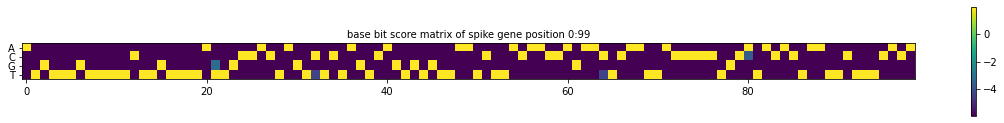

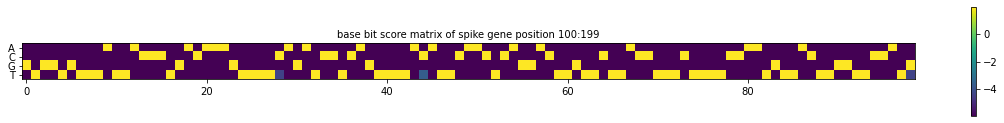

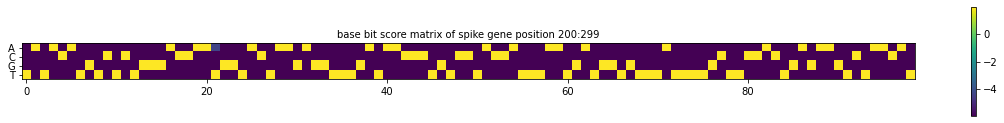

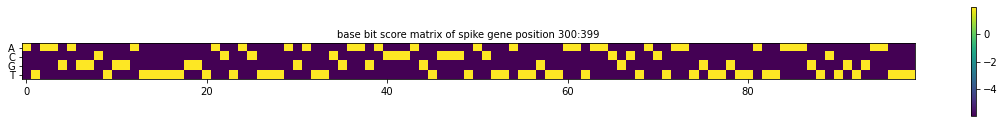

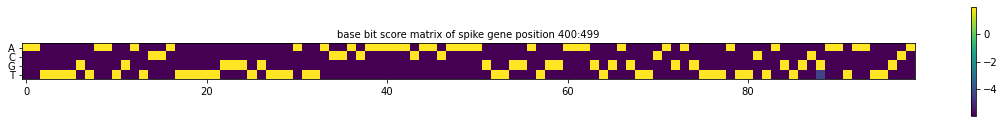

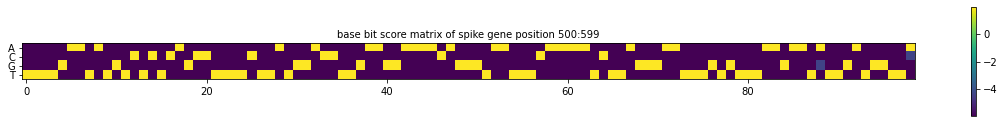

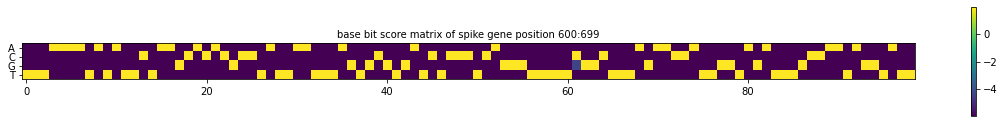

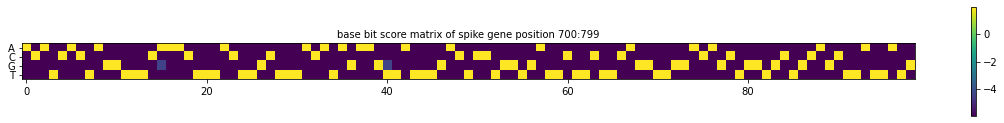

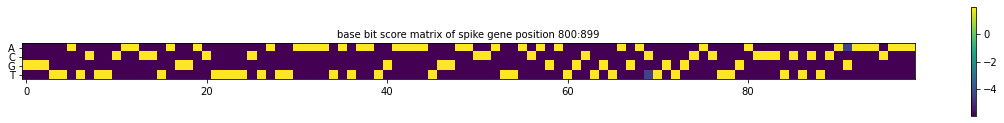

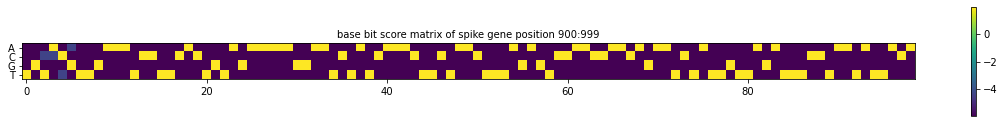

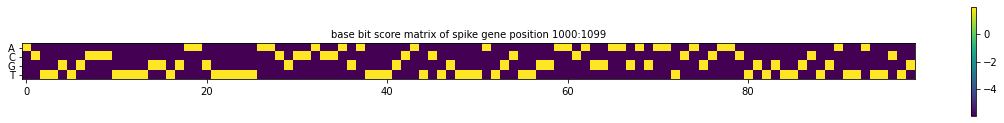

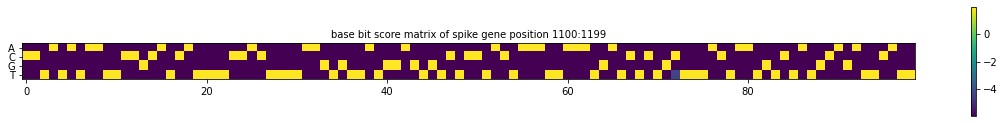

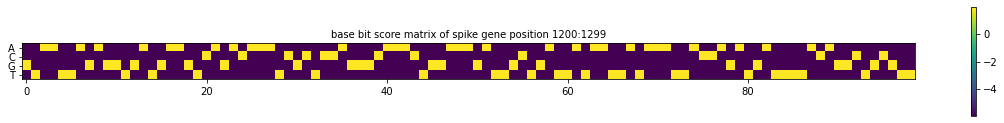

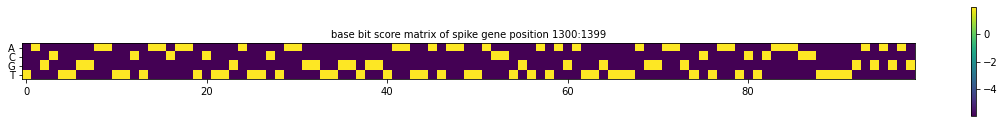

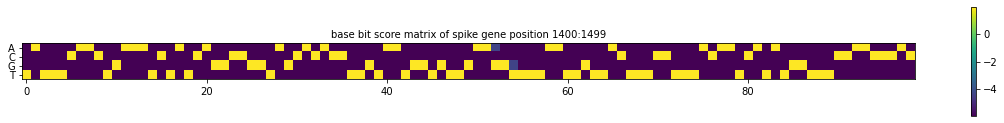

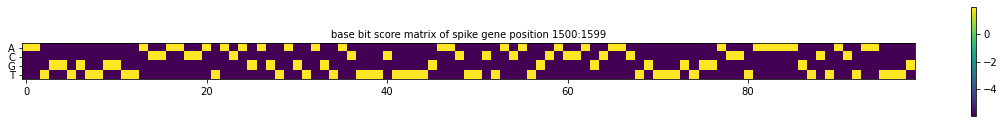

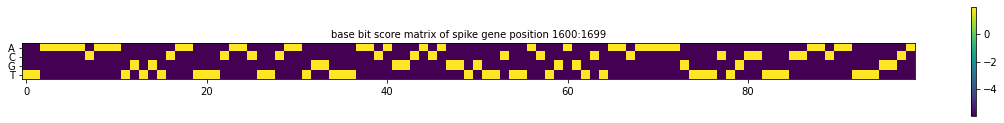

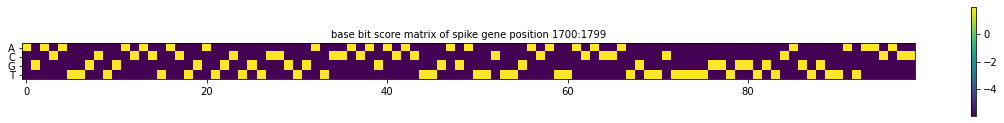

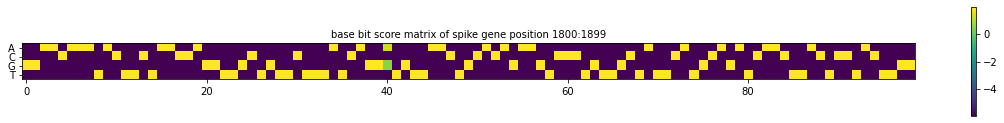

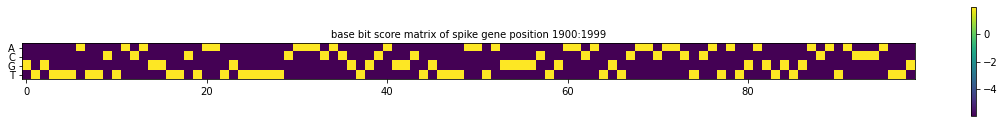

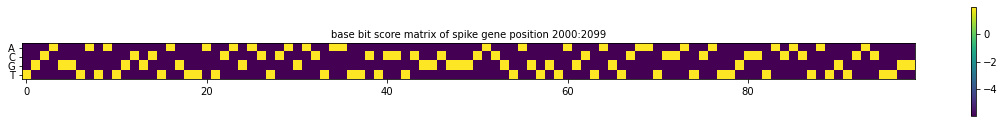

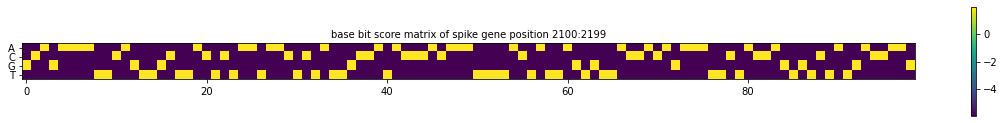

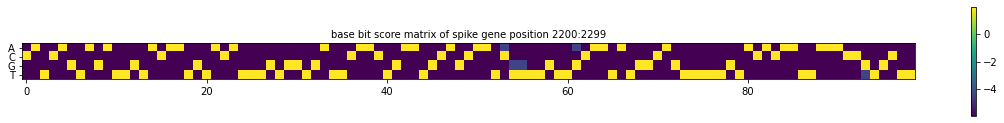

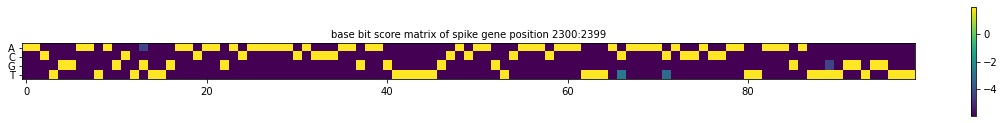

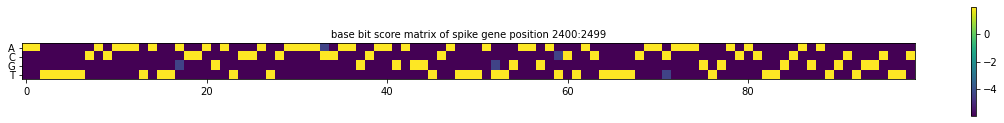

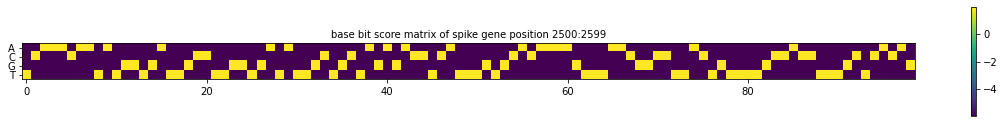

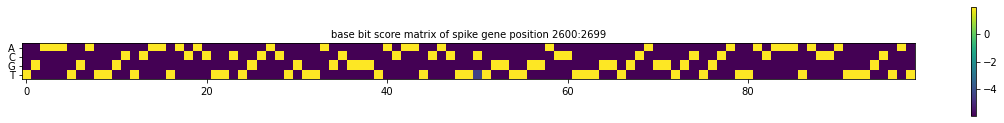

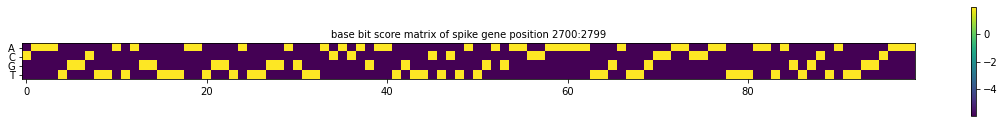

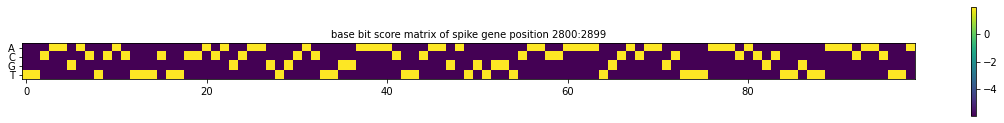

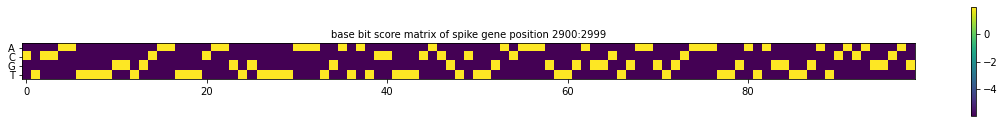

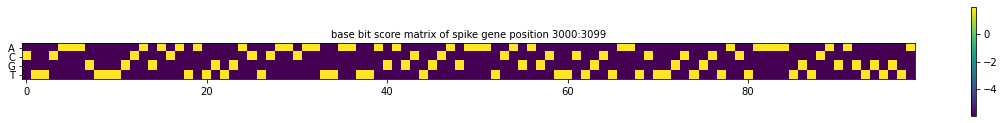

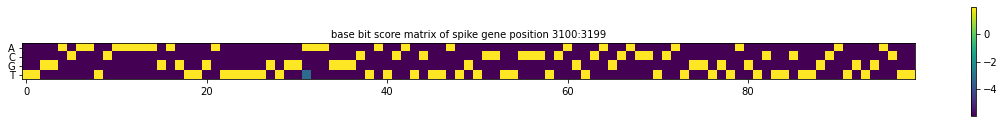

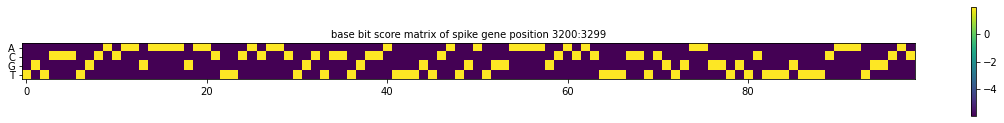

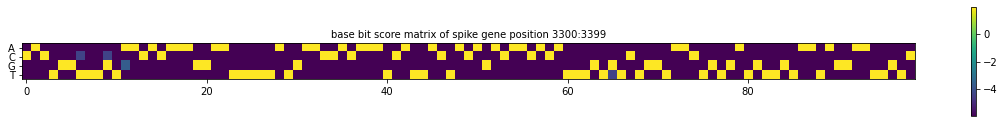

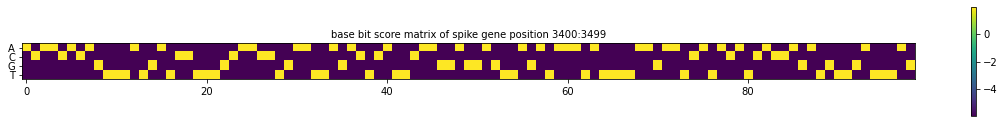

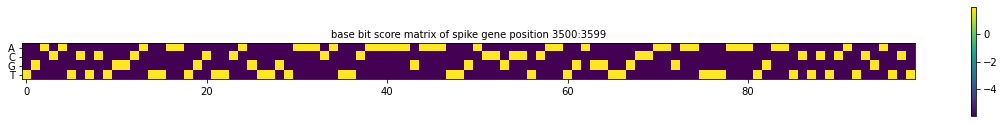

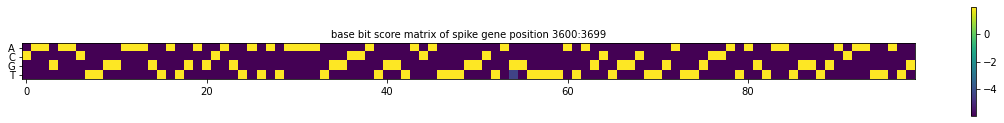

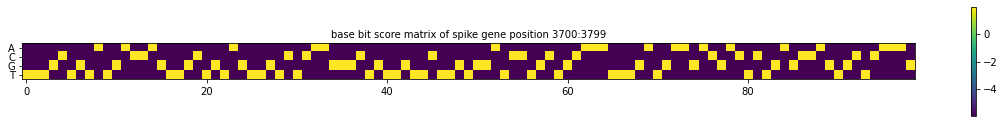

In [304]:
m = motifs.create([x.seq for x in gene_records]) 
number = int(len(m)/100)
start = []
stop = []
for i in range(number):
    n = (i*100)
    s = ((i+1)*100-1)
    start.append(n)
    stop.append(s)
for i in range(len(start)):
    bit_matrix(m, start[i], stop[i])